<h1>Computer Graphics week10 : Convolution Layer</h1>

<h2>201702052 Lee Dongheon</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_inputs, train_labels), (test_inputs, test_labels) = cifar10.load_data()

In [3]:
print(train_inputs.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


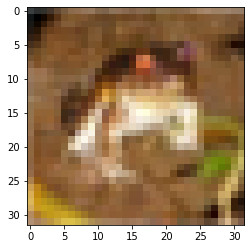

In [4]:
plt.imshow(train_inputs[0])
plt.show()

In [5]:
train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

<h2>Week 10 Homework : Convolution Layer</h2>

<h3>input(32, 32, 3) -> Conv2D(28, 28, 12) -> Pooling -> Conv2D(10, 10, 8) -> output(10)</h3>

In [6]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Conv2D(filters=12, kernel_size=(5, 5), strides=(1, 1), padding='valid'),
                          keras.layers.MaxPool2D(),
                          keras.layers.Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='valid'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(10, activation='softmax'),
])

Metal device set to: Apple M1 Max


2022-01-02 19:11:03.378993: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-02 19:11:03.379101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 12)        912       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 8)         2408      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8010      
                                                                 
Total params: 11,330
Trainable params: 11,330
Non-trainable params: 0
____________________________________________________

In [8]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [9]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20
   1/6250 [..............................] - ETA: 18:49 - loss: 2.3414 - acc: 0.2500

2022-01-02 19:11:03.805168: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/dongheon97/miniforge3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-01-02 19:11:03.905150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6249/6250 [============================>.] - ETA: 0s - loss: 1.6834 - acc: 0.4071

2022-01-02 19:11:35.298317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6250/6250 [==============================] - 35s 6ms/step - loss: 1.6833 - acc: 0.4072 - val_loss: 1.6280 - val_acc: 0.4306
Epoch 2/20
6250/6250 [==============================] - 35s 6ms/step - loss: 1.4854 - acc: 0.4883 - val_loss: 1.4160 - val_acc: 0.5113
Epoch 3/20
6250/6250 [==============================] - 35s 6ms/step - loss: 1.4027 - acc: 0.5173 - val_loss: 1.3749 - val_acc: 0.5225
Epoch 4/20
6250/6250 [==============================] - 34s 5ms/step - loss: 1.3594 - acc: 0.5316 - val_loss: 1.4870 - val_acc: 0.4882
Epoch 5/20
6250/6250 [==============================] - 34s 5ms/step - loss: 1.3325 - acc: 0.5408 - val_loss: 1.2989 - val_acc: 0.5553
Epoch 6/20
6250/6250 [==============================] - 34s 5ms/step - loss: 1.3180 - acc: 0.5474 - val_loss: 1.3308 - val_acc: 0.5449
Epoch 7/20
6250/6250 [==============================] - 34s 5ms/step - loss: 1.3039 - acc: 0.5542 - val_loss: 1.3625 - val_acc: 0.5315
Epoch 8/20
6250/6250 [==============================] - 34s 5ms/st

<h2>Week 10 Practice</h2>

In [10]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax'),
                          ])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               393344    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_flatten = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
test_output1 = model_flatten(tf.expand_dims(train_inputs[0],axis=0))
print(test_output1)

tf.Tensor([[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]], shape=(1, 3072), dtype=float32)


In [13]:
model_dense1 = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
test_output2 = model_dense1(tf.expand_dims(train_inputs[0],axis=0))
print(test_output2)

tf.Tensor(
[[0.         0.         1.0567453  0.3127765  0.23387286 0.9436909
  0.         0.45788696 0.         0.         0.         0.
  0.         1.6429669  0.1005016  0.5730442  0.60434866 0.39518023
  0.         0.         0.         0.0413775  0.         0.
  0.337269   0.         0.         0.         0.         0.
  0.         0.12078214 0.         0.00657079 0.5132768  0.
  0.         0.11444001 0.27408245 0.         0.         0.
  0.3504076  0.08671856 0.42636862 0.6581926  0.         0.87848645
  0.         0.25879306 0.27927285 0.04772884 0.         0.
  0.76743114 0.10241133 0.38547146 0.5359235  0.         0.47053578
  0.4564913  0.         0.26752645 0.         0.         0.
  0.17264551 0.         0.         0.         0.29243267 0.1132045
  0.17530909 0.         0.         0.4977334  0.         0.
  0.7183424  0.31866056 0.08295751 0.         0.59727824 0.24242914
  0.15527818 0.67619    0.         0.59409463 0.         0.
  0.         0.         0.14711869 0.      

In [14]:
model_dense2 = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
test_output3 = model_dense2(tf.expand_dims(train_inputs[0],axis=0))
print(test_output3)

tf.Tensor(
[[0.14621955 0.18109837 0.04876976 0.13060687 0.05398959 0.06637372
  0.05383828 0.0518735  0.14929123 0.11793917]], shape=(1, 10), dtype=float32)


In [15]:
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [16]:
model.fit(x=train_inputs,
          y=train_labels,
          batch_size=8,
          epochs=20,
          validation_data=(test_inputs,test_labels))

Epoch 1/20


2022-01-02 19:22:30.010163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6245/6250 [============================>.] - ETA: 0s - loss: 1.9751 - acc: 0.2657

2022-01-02 19:22:55.640840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6250/6250 [==============================] - 29s 5ms/step - loss: 1.9750 - acc: 0.2658 - val_loss: 1.9653 - val_acc: 0.2636
Epoch 2/20
6250/6250 [==============================] - 28s 4ms/step - loss: 1.8817 - acc: 0.3043 - val_loss: 1.8539 - val_acc: 0.3237
Epoch 3/20
6250/6250 [==============================] - 28s 5ms/step - loss: 1.8560 - acc: 0.3159 - val_loss: 1.8393 - val_acc: 0.3181
Epoch 4/20
6250/6250 [==============================] - 28s 5ms/step - loss: 1.8451 - acc: 0.3219 - val_loss: 1.8388 - val_acc: 0.3314
Epoch 5/20
6250/6250 [==============================] - 28s 5ms/step - loss: 1.8333 - acc: 0.3276 - val_loss: 1.8365 - val_acc: 0.3193
Epoch 6/20
6250/6250 [==============================] - 28s 5ms/step - loss: 1.8257 - acc: 0.3306 - val_loss: 1.8053 - val_acc: 0.3400
Epoch 7/20
6250/6250 [==============================] - 28s 5ms/step - loss: 1.8204 - acc: 0.3317 - val_loss: 1.8168 - val_acc: 0.3338
Epoch 8/20
6250/6250 [==============================] - 28s 5ms/st